# Genetic Algorithms (GA)

![Series of DNA double helices against a dark background. The DNA strands are illuminated in blue, highlighting the iconic twist and ladder-like structure of the molecule.](../../assets/images/ga_0.jpg)

## Understanding The Algorithm

A genetic algorithm (GA) is a metaheuristic inspired by the process of natural selection that belongs to the larger class of evolutionary algorithms (EA). It is based on natural selection to approximate soltuion(s) for a given problem. As a metaheuristic algorithm, it may not find the optimal solution but is at least fast the execute.

Très flexibles, utilisés à la fois pour des problèmes discrets et continus, mais fréquemment appliqués à des problèmes combinatoires.

It starts with a population of possible solutions. Each solution has a genone that encodes it. It is often a binary encoding that differenciates the solution from the others. Chromosomes are encoded or by 1 or by 0. 1 [explain what means 1 or 0 in general]. The population encoding may differ from a problem to another: sometimes it not efficient to use bits, but integers lists, float  list or even graphs to solve a given problem. Same logic is true for the crossover process.

The set of all solutions at a given points is called a generation. First solutions generation is Generation 0. This starting generation is composed of random solutions that should not be optimal at all.

Once a generation is set, natural selection is processed by determining the fitness of current generation solutions and then pick parents. This is done using the fitness function, which tells how good a solution is. In the parents selection process, solutions are picked and fitness score increases chance to be picked.

Once parents are picked, the next step is about crossoverring their genomes. A crossover function has de be defined for that and their are many approach which will be covered bellow. Crossovering parents genome creates news genomes that can be interpreted as children, which creates part of the news generation of solutions.

Children creation is repeated until a new generation is fullfilled.

But since fitness function and crossovering has part of randomness, there is a risk of killing best solutions from the previous generation. To avoid that, we implement an elitism mechanism that saves previous generation best solution and select them to the next generation.

Next step is mutation step: during this phase, we simply mutate a few chromosomes, changing random bits with a certains probability (0->1 / 1->0). After this pahse, a new generation is finnaly ready. 

This generation process lasts as long as a suffisient solutions is not found or for a given number of generations.

If we take a step back, those are the main concepts of this algorithm:
- genetic representation of solution (genomes mades of chromosomes)
- a function to generate new solutions
- a fitness function, evaluating solutions quality
- a selection function, selecting solutions inside a population
- a crossover function, making childrens out of parents genomes
- a mutation function, altering childrens genomes

![The image shows a labeled diagram related to genetic algorithms, consisting of arrays of numbers organized into different categories, each encased in colored boxes with corresponding labels. The smallest array is identified as a gene, the next as a chromosome, and the largest array as a population. Each array builds upon the previous, representing increasingly complex structures in the hierarchy of genetic algorithms. The colors and labels serve to differentiate and explain the relationship between these components.](../../assets/images/ga_1.png "Population decomposition in GA")

#### Here's a step-by-step breakdown of how a genetic algorithm typically works:

1. **Initialization**: The process begins with a population of randomly generated individuals. Each individual, also known as a chromosome, represents a possible solution to the problem at hand. The representation is typically done through a string of bits, characters, or numbers.

2. **Fitness Evaluation**: Each individual in the population is evaluated based on a fitness function. This function determines how 'fit' or 'good' the solution is in solving the problem. The fitness function is problem-specific.

3. **Selection**: The algorithm selects individuals based on their fitness scores. The fitter the individual, the higher the chance it has to be selected. This step mimics natural selection, where the fittest individuals are more likely to reproduce.

4. **Crossover (Recombination)**: Pairs of individuals are selected based on their fitness scores to undergo crossover, where they exchange parts of their chromosome. This simulates biological reproduction and recombination, creating offspring that share traits of both parents.

5. **Mutation**: With a small probability, some parts of the chromosomes are mutated or altered. Mutation introduces new traits into the gene pool and ensures genetic diversity within the population, helping the algorithm to avoid local optima.

6. **New Generation**: The offspring produced from crossover and mutation form a new generation of the population. This new generation then goes through the same process, starting from fitness evaluation.

7. **Iteration or termination**: This process of evolution continues over many generations, with each generation hopefully producing fitter individuals. The algorithm terminates when either a satisfactory solution is found, a maximum number of generations have been produced, or a plateau in fitness levels is observed, indicating that further generations are unlikely to produce better solutions.

<br>

![The image presents a circular flow diagram with five stages involved in a genetic algorithm process, depicted by curved arrows pointing clockwise. Each stage is labeled, indicating the sequence of the algorithm: it begins with "Initialization of Population," followed by "Fitness Function," then moves on to "Selection," followed by "Reproduction," and finally "Converges." The arrows suggest a cyclical process where the end of one phase leads to the beginning of the next, implying iteration until a convergence criterion is met. The background is plain, placing emphasis on the stages and the flow between them.](../../assets/images/ga_2.png "GA stages")

## Usage Examples

Genetic algorithms are highly versatile when they encounter well-defined problem conditions and fitness functions.

1. Robotics: GAs are used in robotics for tasks like optimizing routes for a robot to reach a specific position using minimal resources. This involves generating optimal paths within given environments​.

2. Economics: In economics, GAs help model supply and demand over time, develop game theory and asset pricing models, and represent rational agents in economic models like the cobweb model and agent-based computational economics, including artificial financial markets​​.

3. Automated Design: This includes the design of cars with specifications like minimum fuel consumption. GAs are used to derive automobile designs that meet specific constraints, such as low fuel consumption, crashworthiness, and weight savings​​.

4. Scheduling Tasks: GAs are effective in scheduling tasks, like creating university timetables, where they optimize schedules considering factors like courses, student numbers, and lecture room availability​​.

5. Vehicle Routing: In logistics, GAs optimize routes for transporting goods, ensuring cost-effective delivery to clients at the right time​​.

6. Marketing: They are used to determine the best combinations of product specifications and attributes to attract customers​​.

7. Medicine and Bioinformatics: GAs are employed for tasks such as identifying benign and malignant tumors in medical images, multiple sequence alignment, RNA structure prediction, motif discovery, gene expression profiling analysis, and clinical decision support in various medical fields​​.

8. Neural Networks and Machine Learning: GAs are used in neural network training, particularly in situations where pre-classified training examples are not readily available, and in feature selection for machine learning models​​.

9. Physics and Engineering: They are applied in accelerator physics for optimizing beam dynamics, designing particle accelerator beamlines, and in engineering for optimizing data compression systems and power electronics design​​.

10. Climatology and Environmental Science: GAs assist in climatology for estimating heat flux between the atmosphere and sea ice and in modeling global temperature changes. They are also used in the design of water resource systems and groundwater monitoring networks​​.

11. Financial Mathematics: In financial mathematics, GAs are utilized for real options valuation and portfolio optimization​​.

12. Anti-terrorism and Linguistic Analysis: They aid in designing anti-terrorism systems and in linguistic analysis, including grammar induction and aspects of natural language processing like word-sense disambiguation​​.

13. Audio Watermark Insertion/Detection and Airlines Revenue Management: GAs find use in the insertion and detection of audio watermarks, as well as in managing revenue for airlines​​.

14. Container Loading Optimization: This application involves optimizing the loading of containers to maximize space usage and efficiency​​.​

## Strengths

1. **Optimization of Parameters in Machine Learning**: Genetic Algorithms are highly adept at optimizing hyperparameters in machine learning models. For instance, in models like neural networks, they can efficiently navigate complex search spaces and handle continuous parameters. This capability makes them ideal for refining model performance. The Tree-Based Pipeline Optimization (TPOT) framework, which is an Auto-ML framework, exemplifies this by using genetic algorithms to optimize machine learning pipelines. In the context of feature selection in machine learning, for example, GAs can efficiently identify the most relevant features from a dataset. This process involves defining a fitness score for each feature set, where the genetic algorithm iteratively selects and evaluates feature combinations to maximize the fitness score, typically measured in terms of model accuracy or performance.

2. **Search from a Population of Points**: Unlike traditional algorithms that search from a single point, GAs explore multiple solutions simultaneously by maintaining a population of potential solutions. This approach increases the probability of finding a globally optimal solution and reduces the risk of getting stuck in local optima.

3. **Support for Multi-objective Optimization**: GAs are well-suited for problems that require optimizing multiple objectives simultaneously. They can effectively balance and find trade-offs between competing objectives, which is a common scenario in complex real-world problems.

4. **Robustness in Noisy Environments**: GAs demonstrate robustness in environments where the solution space is "noisy" or where objective functions are not smooth or well-defined. This makes them useful in practical scenarios where data may be imperfect or incomplete.

5. **Effective for Mixed Discrete/Continuous Problems**: GAs are versatile in handling problems that involve both discrete and continuous variables. This flexibility is particularly beneficial in complex optimization problems where different types of variables need to be optimized simultaneously.

## Weaknesses

1. **Artistic Implementation**: The implementation of GAs is often considered more of an art than a science. This is because successfully implementing a GA requires a deep understanding of the problem domain and a skillful design of its components, like the representation, fitness function, and genetic operators.

2. **Design of Objective Function and Operators**: While GAs require less information about the problem compared to other methods, designing an effective objective function and choosing the right representation and operators can be challenging. If these elements are not well-designed, the GA may not perform optimally.

3. **Computational Expense**: GAs are known to be computationally expensive and time-consuming, especially for problems with larger populations or higher complexity. This is due to the iterative nature of the algorithm and the need to evaluate multiple solutions over several generations.

4. **Premature Convergence**: One of the critical issues with GAs is premature convergence to sub-optimal solutions. This problem occurs when the population of solutions loses diversity too quickly, leading the algorithm to converge on a solution that is not the best possible outcome.

5. **Stochastic Nature**: The random aspects of GAs, such as mutation and crossover, can lead to a lack of predictability and transparency in the algorithm's behavior. This stochastic nature makes GAs less suitable for problems that require consistent and repeatable outcomes.

6. **Not Always Optimal for Well-Understood Problems**: For problems with well-understood mathematical properties, traditional optimization methods might be more effective and efficient than GAs. This is because traditional methods can exploit the mathematical characteristics of the problem, whereas GAs do not make assumptions about the problem's nature.

### Some encoding methods

Keep in mind that each encoding method has its own set of strengths and is chosen based on the nature of the problem and the specific requirements of the genetic algorithm being implemented.

1. **Binary Encoding**: This is the most common method where chromosomes are represented as strings of bits (0s and 1s). It's particularly effective for problems that can naturally be encoded in binary form. However, it may not always be the most natural representation for many problems, and sometimes corrections are needed after crossover and mutation.

2. **Permutation Encoding**: Used in ordering problems like the traveling salesman problem. Chromosomes are represented as strings of numbers, each denoting a position in a sequence. It's specifically useful for problems where the sequence of elements is crucial. This method requires specific types of crossover and mutation to maintain a valid sequence.

3. **Value Encoding**: Suitable for problems that require the representation of complicated values like real numbers. Each chromosome is a string of values, which could be anything from numbers and characters to more complex objects. This encoding is very flexible but often needs the development of new, problem-specific crossover and mutation methods.

4. **Real-Value Encoding**: Represents a gene with numeric values, strings, or symbols, expressing the solution in its natural state. This encoding is used when potential solutions contain continuous values that cannot be easily encoded with binary encoding.

5. **Order Encoding**: Also known as permutation encoding, represents a chromosome as a sequence of elements, requiring all elements to be present in the chromosome. It's useful for problems where the sequence in the solution is important.

6. **Tree Encoding**: Represents a chromosome as a tree of elements. This method is versatile for solutions where the hierarchy of elements is important or required, and it can even represent code functions, consisting of a tree of expressions.

## Python Demonstration

### Genetic algorithm design

In [2]:
import random

def fitness(individual, items, max_weight):
    """
    Calculate the fitness of an individual.

    Fitness is defined as the total value of items selected by the individual,
    considering a penalty for exceeding the maximum weight capacity.

    Args:
    - individual (list): A list representing the individual, where each element
      is 0 (item not included) or 1 (item included).
    - items (list): A list of dictionaries, where each dictionary represents an
      item with 'weight' and 'value'.
    - max_weight (int): The maximum weight capacity of the knapsack.

    Returns:
    - int: The total value of the individual if under max_weight, else 0.
    """
    total_value, total_weight = 0, 0
    for i, item in enumerate(items):
        if individual[i] == 1:
            total_weight += item['weight']
            total_value += item['value']
            if total_weight > max_weight:
                return 0
    return total_value

def select(population, fitnesses):
    """
    Select an individual from the population based on fitness proportionate selection.

    Args:
    - population (list): A list of individuals.
    - fitnesses (list): A list of fitness values for the individuals.

    Returns:
    - list: An individual selected from the population.
    """
    total_fitness = sum(fitnesses)
    selection_probs = [f/total_fitness for f in fitnesses]
    return population[random.choices(range(len(population)), weights=selection_probs, k=1)[0]]

def crossover(parent1, parent2):
    """
    Perform crossover between two parents to create offspring.

    Args:
    - parent1 (list): The first parent individual.
    - parent2 (list): The second parent individual.

    Returns:
    - tuple: Two offspring individuals created from the parents.
    """
    point = random.randint(1, len(parent1) - 1)
    return parent1[:point] + parent2[point:], parent2[:point] + parent1[point:]

def mutate(individual, mutation_rate):
    """
    Mutate an individual by flipping bits with a given probability.

    Args:
    - individual (list): The individual to mutate.
    - mutation_rate (float): The probability of mutating each bit.

    Returns:
    - list: The mutated individual.
    """
    return [1 - gene if random.random() < mutation_rate else gene for gene in individual]

def genetic_algorithm_knapsack(items, max_weight, population_size, generations, crossover_rate, mutation_rate):
    """
    Solve the knapsack problem using a genetic algorithm.

    Args:
    - items (list): A list of items, each item is a dictionary with 'name', 'weight', and 'value'.
    - max_weight (int): The maximum weight capacity of the knapsack.
    - population_size (int): The number of individuals in the population.
    - generations (int): The number of generations to run the algorithm for.
    - crossover_rate (float): The probability of crossover.
    - mutation_rate (float): The mutation rate.

    Returns:
    - list: The items included in the best individual found, represented as a list of dictionaries.
    """
    # Initialize population
    population = [[random.randint(0, 1) for _ in items] for _ in range(population_size)]
    
    # Iterate over generations
    for _ in range(generations):
        new_population = []
        fitnesses = [fitness(individual, items, max_weight) for individual in population]
        
        # Generate new population
        for _ in range(population_size):
            parent1 = select(population, fitnesses)
            parent2 = select(population, fitnesses)
            if random.random() < crossover_rate:
                offspring1, offspring2 = crossover(parent1, parent2)
            else:
                offspring1, offspring2 = parent1, parent2
            new_population.extend([mutate(offspring1, mutation_rate), mutate(offspring2, mutation_rate)])
        
        population = new_population
    
    # Find and return the best individual
    best_individual = max(population, key=lambda ind: fitness(ind, items, max_weight))
    return [{'name': item['name'], 'weight': item['weight'], 'value': item['value']} for item, included in zip(items, best_individual) if included]

### Problem initialization

In [4]:
from assets.datasets.knapsack import Knapsack
knapsack = Knapsack(20, seed=42) # Gets random x items
knapsack.show_state()

Total weight (taking everything): 7.650000000000001 kg 
Total value (taking everything): 1562 $


### Hyperparameters setup

In [5]:
knapsack.weight_limit = 8
# knapsack.weight_limit:
# Specifies the maximum weight capacity of the knapsack. It is a constraint for the problem, determining which
# combinations of items can be considered valid solutions. Solutions that exceed this weight are penalized or
# deemed infeasible, ensuring the knapsack is not overloaded.

population_size = 50
# population_size:
# Determines the number of individuals (solutions) in each generation of the genetic algorithm. A larger population
# size allows for greater diversity of solutions, potentially leading to better overall solutions but at the cost
# of increased computational resources and possibly slower convergence.

generations = 100
# generations:
# Defines the number of iterations or cycles the genetic algorithm will run. More generations allow for more
# opportunities for the population to evolve towards an optimal solution, but also require more computational time.
# Fewer generations might lead to faster execution but possibly less optimal solutions.

crossover_rate = 0.7
# crossover_rate:
# Indicates the probability of crossover (genetic recombination) occurring between pairs of parents during the
# reproduction process. A higher rate encourages diversity in the population by combining genetic material from
# different individuals, while a lower rate reduces the frequency of crossover events, potentially leading to
# premature convergence.

mutation_rate = 0.01
# mutation_rate:
# Specifies the probability of a mutation occurring in an individual's gene. Mutation introduces genetic variation
# and helps prevent the algorithm from getting stuck in local optima by occasionally altering solution components.
# A higher mutation rate increases diversity but may disrupt convergence, while a lower rate maintains more
# stability in the population's genetic makeup.


### Execution

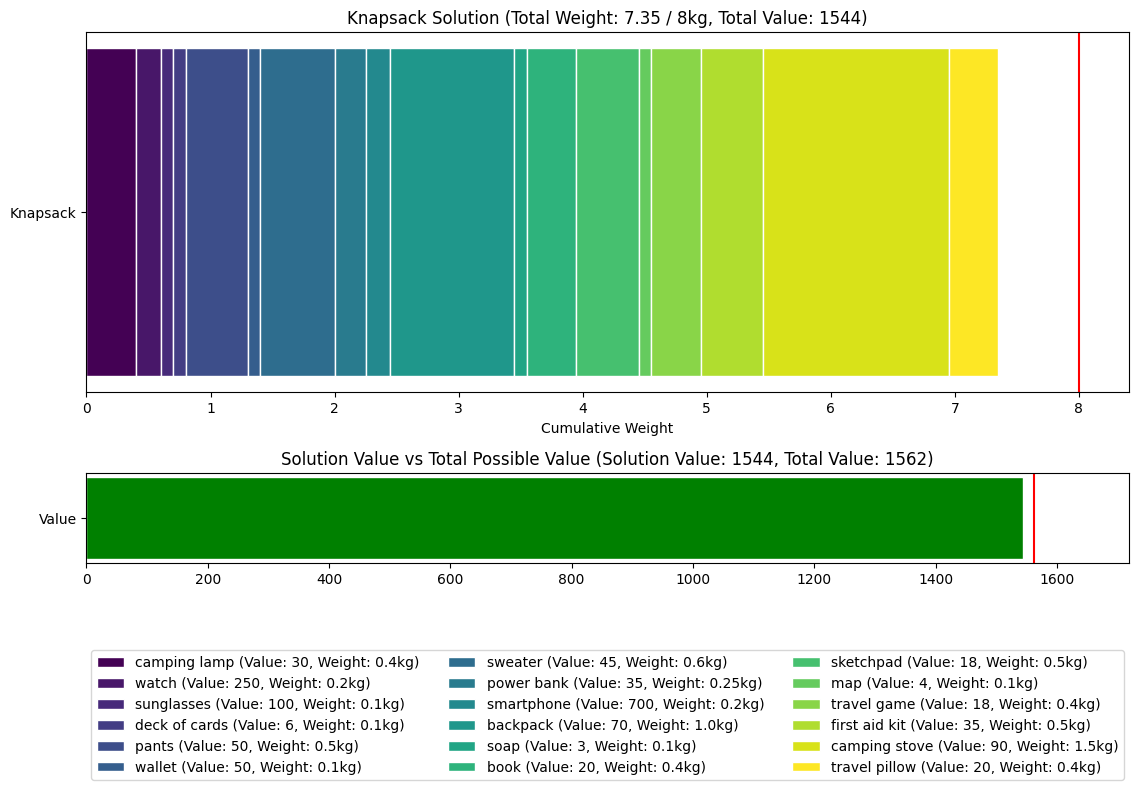

In [6]:
knapsack.solution = genetic_algorithm_knapsack(knapsack.items, knapsack.weight_limit, population_size, generations, crossover_rate, mutation_rate)
knapsack.plot_cumulative_knapsack_with_value()

End of demonstration

---
## Practical Optimization Tools

1. [**DEAP (Python):** ](https://github.com/DEAP/deap) DEAP, or Distributed Evolutionary Algorithms in Python, is a novel evolutionary computation framework. It offers tools for building both genetic algorithms and genetic programming systems. DEAP stands out for its flexibility and ease of use, enabling rapid prototyping and testing of complex evolutionary algorithms.

2. [**Jenetics (Java):** ](https://jenetics.io/) Jenetics is an advanced Genetic Algorithm, Genetic Programming, and Genetic Evolution library, written in modern-day Java. It emphasizes a rich, strongly-typed genetic algorithm framework, making it suitable for complex genetic evolutionary developments. Its design is robust, facilitating easy integration into existing Java applications.

3. [**Pyevolve (Python):** ](https://pyevolve.sourceforge.net/) Pyevolve is a Python open-source framework for genetic algorithms. It offers a simple yet powerful platform for implementing and testing various genetic algorithms. Pyevolve is known for its versatility and includes features like graphical statistics, a built-in interactive shell, and a wide range of genetic operators and functions.

4. [**EO (C++):** ](https://eodev.sourceforge.net/) EO, short for Evolving Objects, is a versatile C++ library specifically designed for evolutionary computation. It includes support for genetic algorithms, evolutionary strategies, genetic programming, and other evolutionary algorithms. EO is known for its modularity and flexibility, allowing users to easily adapt and extend it for complex evolutionary computation tasks. Its efficient C++ implementation makes it suitable for high-performance applications.

## Sources

| Sources |
|---------|
| [Genetic algorithm - Wikipedia](https://en.wikipedia.org/wiki/Genetic_algorithm) |
| [Encoding Methods in Genetic Algorithm - Geeksforgeeks](https://www.geeksforgeeks.org/encoding-methods-in-genetic-algorithm/) |
| [Encoding Techniques In Genetic Algorithm - Geekculture](https://medium.com/geekculture/encoding-techniques-in-genetic-algorithm-371bccbe4bf7) |
| [Genetic Algorithm - Techopedia](https://www.techopedia.com/definition/17137/genetic-algorithm) |
| [Genetic Algorithm (GA): A Simple and Intuitive Guide - Towardsdatascience](https://towardsdatascience.com/genetic-algorithm-a-simple-and-intuitive-guide-51c04cc1f9ed) |
| [What Is the Genetic Algorithm? - Mathworks](https://fr.mathworks.com/help/gads/what-is-the-genetic-algorithm.html) |
| [Real-World Uses for Genetic Algorithms - Baeldung](https://www.baeldung.com/cs/genetic-algorithms-applications) |
| [List of genetic algorithm applications - Wikipedia](https://en.wikipedia.org/wiki/List_of_genetic_algorithm_applications) |
| [Genetic Algorithms and its use-cases in Machine Learning - Analyticsvidhya](https://www.analyticsvidhya.com/blog/2021/06/genetic-algorithms-and-its-use-cases-in-machine-learning/) |
| [Genetic Algorithm – Advantages & Disadvantages - Electricalvoice](https://electricalvoice.com/genetic-algorithm-advantages-disadvantages/) |
| [Genetic Algorithms in Machine Learning: An Introduction - Knowledgehut](https://www.knowledgehut.com/blog/data-science/genetic-algorithm-in-machine-learning) |
| [Encoding genetic algorithms - Rishal Hurbans' website](https://rhurbans.com/encoding-genetic-algorithms) |
| [Encoding - Marek Obitko's website](https://www.obitko.com/tutorials/genetic-algorithms/encoding.php) |
| [Cycle diagram- Educba](https://www.educba.com/what-is-genetic-algorithm/) |
